In [1]:
import numpy as np

mass=40
arrlen=20
ui=-2;uf=2
q=1;
# ui=0;uf=0

In [2]:
eref1=1.25;bref1=80

In [15]:
ecc1=np.linspace(1.09,1.3,arrlen)

impacts1=np.linspace(60,150,arrlen)

In [17]:
ecc1

array([1.09      , 1.10105263, 1.11210526, 1.12315789, 1.13421053,
       1.14526316, 1.15631579, 1.16736842, 1.17842105, 1.18947368,
       1.20052632, 1.21157895, 1.22263158, 1.23368421, 1.24473684,
       1.25578947, 1.26684211, 1.27789474, 1.28894737, 1.3       ])

In [19]:
impacts1

array([ 60.        ,  64.73684211,  69.47368421,  74.21052632,
        78.94736842,  83.68421053,  88.42105263,  93.15789474,
        97.89473684, 102.63157895, 107.36842105, 112.10526316,
       116.84210526, 121.57894737, 126.31578947, 131.05263158,
       135.78947368, 140.52631579, 145.26315789, 150.        ])

In [4]:
# ecc1=np.linspace(1.09,1.4,arrlen)

# impacts1=np.linspace(40,150,arrlen)

In [5]:
# ecc1=np.linspace(1.09,1.4,arrlen)

# impacts1=np.linspace(40,150,arrlen)

In [6]:
import pycbc.waveform
from pycbc.waveform import td_approximants
import os
import matplotlib.pyplot as plt
import pylab
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
#from constants import *
from pycbc.waveform import get_td_waveform
from multiprocess import Pool
import pickle

In [7]:
delta_t = 1./1024
inc=np.pi/3
#distance=1e6*pc
order=3
f_lower = 10
matchfactor=0.99

In [8]:
hp, hc = get_td_waveform(approximant='HyperbolicTD',
                                 mass1=mass/2,
                                 mass2=mass/2,
                                 delta_t=delta_t,
                                 hyp_eccentricity = eref1,
                                 b = bref1,
                                 inclination = inc,
                                 ui = ui,
                                 uf = uf,
                                 distance = 1,
                                 phase_order = -1,
                                 f_lower = f_lower)
psd = aLIGOZeroDetHighPower(len(hc) // 2 + 1, 1.0 / hc.duration, f_lower)

In [20]:
matches=np.zeros((len(ecc1),len(impacts1)))

In [21]:
# hp2, hc2 = get_td_waveform(approximant='HyperbolicTD',
#                                  mass1=mass/2,
#                                  mass2=mass/2,
#                                  delta_t=delta_t,
#                                  hyp_eccentricity = eref1,
#                                  b = bref1,
#                                  inclination = inc,
#                                  ui = ui,
#                                  uf = uf,
#                                  distance = 1,
#                                  phase_order = -1,
#                                  f_lower = f_lower)

In [22]:
# hc2 = hc2[:len(hc)] if len(hc) < len(hc2) else hc2
# hc2.resize(len(hc))

# m, idx = match(hc, hc2, psd=psd, low_frequency_cutoff=f_lower)
# m

In [43]:
for i in range(arrlen):
    for j in range(arrlen):
        hp2, hc2 = get_td_waveform(approximant='HyperbolicTD',
                                 mass1=mass/2,
                                 mass2=mass/2,
                                 delta_t=delta_t,
                                 hyp_eccentricity = ecc1[i],
                                 b = impacts1[j],
                                 inclination = inc,
                                 ui = ui,
                                 uf = uf,
                                 distance = 1,
                                 phase_order = -1,
                                 f_lower = f_lower)
        hc2 = hc2[:len(hc)] if len(hc) < len(hc2) else hc2
        hc2.resize(len(hc))

        m, idx = match(hc, hc2, psd=psd, low_frequency_cutoff=f_lower)
        matches[i,j]=m

In [56]:
ind=np.where(matches>=0.99)
ind

(array([ 5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  9,  9,  9, 10, 10, 10, 11,
        11, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17,
        18, 18, 19, 19, 19]),
 array([7, 8, 9, 7, 8, 6, 7, 8, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 4, 5, 6, 4,
        5, 6, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 2, 3, 4]))

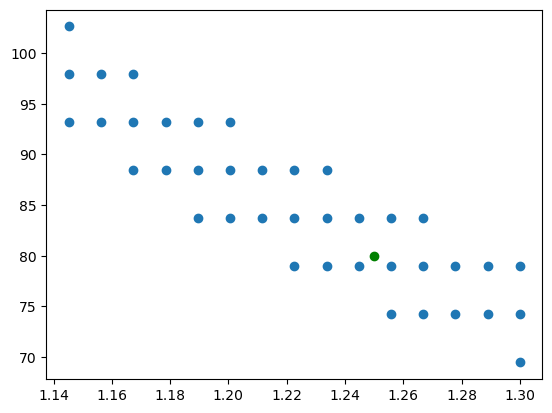

In [60]:
plt.scatter(ecc1[ind[0]],impacts1[ind[1]])
plt.scatter(eref1,bref1,color='g')
plt.show()

In [ ]:
plt.plot(ecc)

In [47]:
A=np.array([[1,2],[3,4]])

In [50]:
np.where(A>1)

(array([0, 1, 1]), array([1, 0, 1]))

In [24]:
p1,q1=int(np.where(ecc1==eref1)[0]),int(np.where(bref==brefp)[0])

TypeError: only size-1 arrays can be converted to Python scalars

In [41]:
p1=np.where(ecc1<=eref1)[0][-1];q1=np.where(impacts1<=bref1)[0][-1]
p1,q1,ecc1[p1],impacts1[q1],matches[p1,q1]

(14, 4, 1.2447368421052631, 78.94736842105263, 0.9990192826804811)

In [42]:
p1-1,q1-1,ecc1[p1-1],impacts1[q1-1],matches[p1-1,q1-1]

(13, 3, 1.2336842105263157, 74.21052631578948, 0.9832046394871864)

In [39]:
[ecc, impacts] = np.meshgrid(ecc1, impacts1)

[]

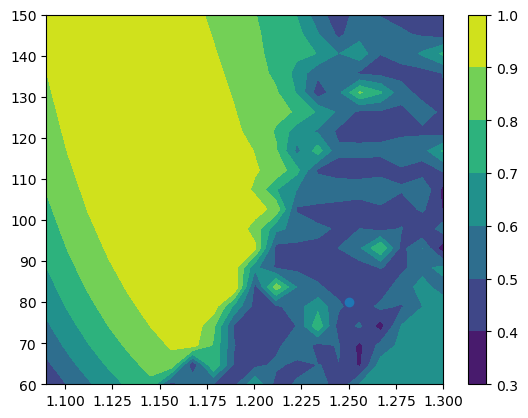

In [63]:
cp =plt.contourf(ecc, impacts, matches)
plt.scatter(eref1,bref1)
cbar = plt.colorbar(cp)
plt.plot()